In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [41]:
df = pd.read_csv('Telco-Customer-Churn.csv')


In [42]:
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


In [43]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [44]:
df = pd.get_dummies(df, drop_first=True)


In [45]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [48]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [50]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/15
159/159 [==============================] - 2s 4ms/step - loss: 0.4687 - accuracy: 0.7556 - val_loss: 0.4120 - val_accuracy: 0.8135
Epoch 2/15
159/159 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.7973 - val_loss: 0.4040 - val_accuracy: 0.8153
Epoch 3/15
159/159 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8030 - val_loss: 0.3983 - val_accuracy: 0.8206
Epoch 4/15
159/159 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8066 - val_loss: 0.3946 - val_accuracy: 0.8259
Epoch 5/15
159/159 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8117 - val_loss: 0.3907 - val_accuracy: 0.8295
Epoch 6/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8078 - val_loss: 0.3920 - val_accuracy: 0.8171
Epoch 7/15
159/159 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8109 - val_loss: 0.3940 - val_accuracy: 0.8188
Epoch 

44/44 [==============================] - 0s 2ms/step


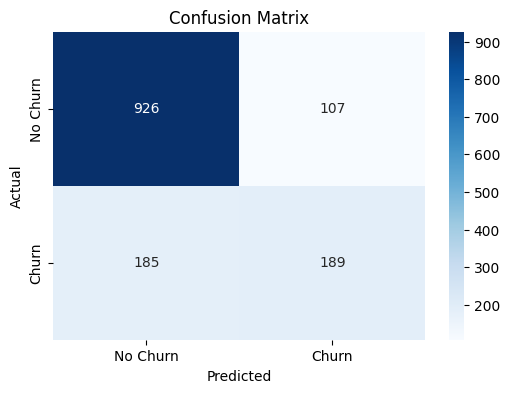

In [51]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


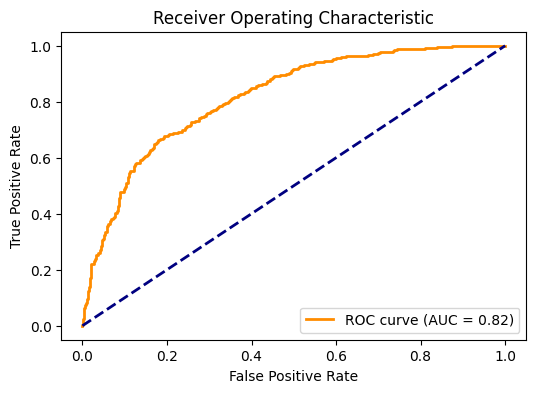

Test Accuracy: 0.7925


In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
